In [1]:
import numpy as np
from graphviz import Digraph
from matplotlib import pyplot as plt

from libmcc import mcc

%config InlineBackend.figure_format = 'svg'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight', 'dpi': 300}

In [2]:
print(mcc.get_resistance.__doc__)

res = get_resistance(circuit)

Wrapper for ``get_resistance``.

Parameters
----------
circuit : input rank-2 array('i') with bounds (f2py_circuit_d0,f2py_circuit_d1)

Returns
-------
res : float



In [3]:
print(mcc.simulate_annealing.__doc__)

trajectory = simulate_annealing(circuit,n_nodes,target_resistance,temperature_interval,anneal_kind,n_steps)

Wrapper for ``simulate_annealing``.

Parameters
----------
circuit : in/output rank-2 array('i') with bounds (f2py_circuit_d0,f2py_circuit_d1)
n_nodes : input int
target_resistance : input float
temperature_interval : input rank-1 array('d') with bounds (2)
anneal_kind : input string(len=-1)
n_steps : input int

Returns
-------
trajectory : rank-1 array('d') with bounds (n_steps)



In [4]:
n_nodes = 25
n_resistors = 50
n_steps = 500_000
temperature = 1e-3

In [5]:
circuit = np.repeat(np.array([[1, 2]], dtype='int32').T, n_resistors, 1)
circuit = np.asfortranarray(circuit)

In [6]:
mcc.get_resistance(circuit)

0.02

In [7]:
traj = mcc.simulate_annealing(circuit, n_nodes, np.pi, [temperature, 1e-3*temperature], 'exponential', n_steps)

In [8]:
print(np.pi)
print(mcc.get_resistance(circuit))

3.141592653589793
3.141592660778013


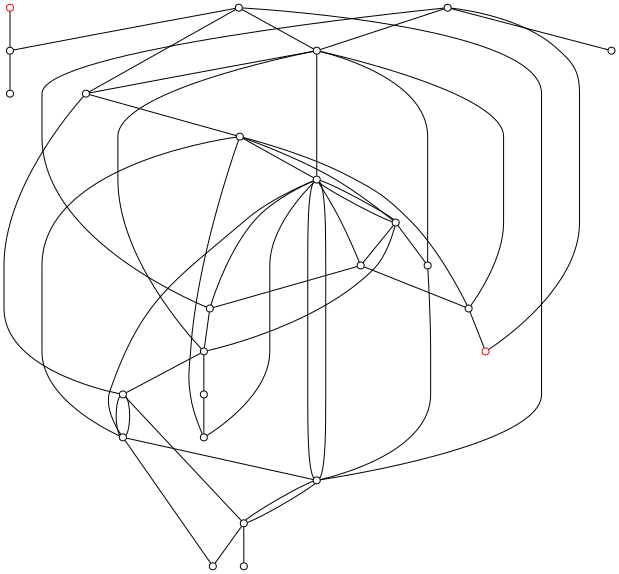

In [9]:
dot = Digraph(
    node_attr=dict(width='0.1', height='0.1', label=''),
    edge_attr=dict(dir='none'),
)
dot.node('1', color='red')
dot.node('2', color='red')
for i, j in circuit.T.astype(str):
    for k in [i, j]:
        dot.node(k)
    dot.edge(i, j)
dot

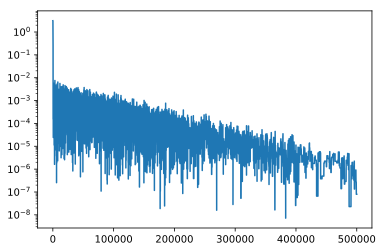

In [10]:
plt.semilogy(traj)